In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from mpl_toolkits.mplot3d import Axes3D

## Loading and Plotting manual control data

(43, 3, 240, 320)


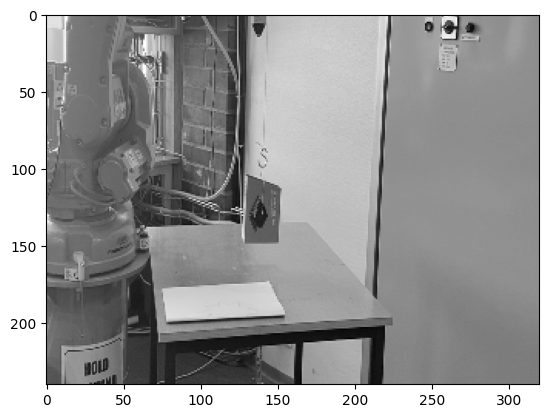

In [17]:
file_name = '/Users/yuriyyurchenko/Documents/UiS/Semester_4/Thesis/Control/newexample22_15-53-12.npz'

data = np.load(file_name, allow_pickle=True)
data = data['arr_0']


# get action vector from the dictionary
action_vector = data.item().get('action')
observation_vector = data.item().get('obs')
print(np.shape(observation_vector))
plt.imshow(observation_vector[1][0], cmap='gray')
plt.show()

## Loading and Plotting PPO trajectories

In [172]:
# Select trial
trial = 1

# Define directories
dir_name = '/Users/yuriyyurchenko/Documents/UiS/Semester_4/Thesis/env/'
trial_names = ['original', 'blue_thing', 'move_sheet', 'no_camera', 'short_rope']
print_names = ['Baseline', 'Blue Object', 'Moved sheet', 'No camera', 'Short rope']
print('Available trials: ', print_names)

dir_name = dir_name + trial_names[trial] + '/'

print('Selected trial: ', trial_names[trial])

# List of all files that start with "example" in chronological order
file_list = sorted([file for file in os.listdir(dir_name) if file.startswith('episode')],
                   key=lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else 0)
print('\nList of episodes:')
print(file_list)


Available trials:  ['Baseline', 'Blue Object', 'Moved sheet', 'No camera', 'Short rope']
Selected trial:  blue_thing

List of episodes:
['episode1_log_17-40-46.npz', 'episode2_log_17-41-04.npz', 'episode3_log_17-41-19.npz', 'episode4_log_17-41-36.npz']


### Check if all the episodes in this trial are the same

In [142]:
# Initialize a flag to track if the action list is the same
same_action = True
prev_action = None

for file_name in file_list:
    # Load the file
    data = np.load(dir_name + file_name, allow_pickle=True)
    
    # Extract the 'action_probs' array
    action = data['action_probs']
    
    # Compare the current 'action' array with the previous one
    if prev_action is None:
        prev_action = action
    elif not np.array_equal(prev_action, action):
        same_action = False
        break
    
    # Update the previous action array
    prev_action = action

# Check the result
if same_action:
    print("The 'action_probs' list is the same for all files.")
else:
    print("The 'action_probs' list is different for at least one file.")

The 'action_probs' list is the same for all files.


No camera has different movements for at least one episode

In [143]:
data = np.load(dir_name + file_list[0], allow_pickle=True)
obs = data['obs']
action= data['action_probs']

In [144]:
# print the first action vector
print(action)

[5 5 0 0 0 0 5 5]


Available trials:  ['Baseline', 'Blue Object', 'Moved sheet', 'No camera', 'Short rope']
Selected trial:  short_rope


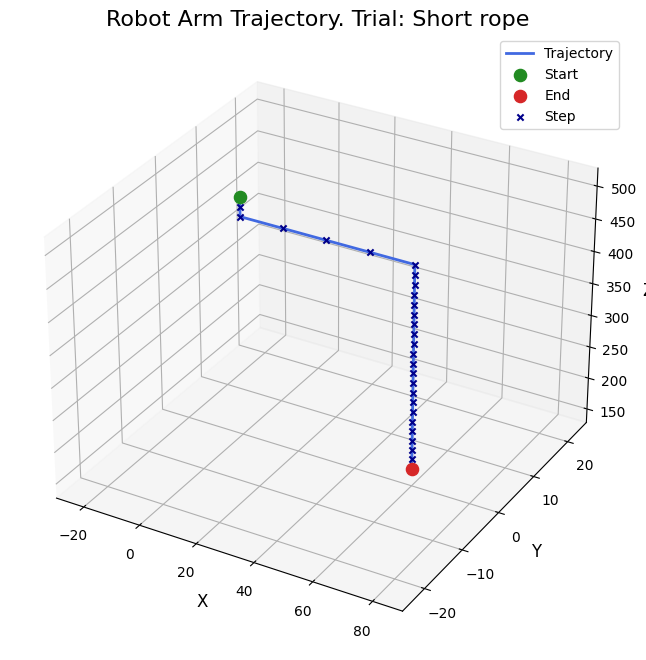

In [294]:
# Select trial
trial = 4

# Define directories
dir_name = '/Users/yuriyyurchenko/Documents/UiS/Semester_4/Thesis/env/'
trial_names = ['original', 'blue_thing', 'move_sheet', 'no_camera', 'short_rope']
print_names = ['Baseline', 'Blue Object', 'Moved sheet', 'No camera', 'Short rope']
print('Available trials: ', print_names)

dir_name = dir_name + trial_names[trial] + '/'

print('Selected trial: ', trial_names[trial])

# List of all files that start with "example" in chronological order
file_list = sorted([file for file in os.listdir(dir_name) if file.startswith('episode')],
                   key=lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else 0)

data = np.load(dir_name + file_list[0], allow_pickle=True)
obs = data['obs']
action= data['action_probs']
action_vector = np.array(action)

# Define the initial position and the magnitude
position = [0, 0, 500]
magnitude = 15

# Create lists to store the x, y, and z coordinates
x_coords, y_coords, z_coords = [], [], []

# Add the initial position to the coordinate lists
x_coords.append(position[0])
y_coords.append(position[1])
z_coords.append(position[2])

# Iterate over the action vector
for action in action_vector:
    if action == 0:
        position[0] += magnitude
    elif action == 1:
        position[0] -= magnitude
    elif action == 2:
        position[1] -= magnitude
    elif action == 3:
        position[1] += magnitude
    elif action == 4:
        position[2] += magnitude
    elif action == 5:
        position[2] -= magnitude
    
    # Add the new position to the coordinate lists
    x_coords.append(position[0])
    y_coords.append(position[1])
    z_coords.append(position[2])

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))  # Increase the size of the plot
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory with color
ax.plot(x_coords, y_coords, z_coords, color='royalblue', linewidth=2, label='Trajectory')

# Mark the start and end positions
ax.scatter(x_coords[0], y_coords[0], z_coords[0], color='forestgreen', s=77, label='Start')
ax.scatter(x_coords[-1], y_coords[-1], z_coords[-1], color='tab:red', s=77, label='End')

# Add markers for steps
for i, (x, y, z) in enumerate(zip(x_coords[1:-1], y_coords[1:-1], z_coords[1:-1])):
    if i == 0:
        ax.scatter(x, y, z, color='darkblue', marker='x', label='Step')
    else:
        ax.scatter(x, y, z, color='darkblue', marker='x')

# Set labels
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Set title
ax.set_title(f'Robot Arm Trajectory. Trial: {print_names[trial]}', fontsize=16)

# Add a grid
ax.grid(True)

# Calculate the maximum and minimum for each axis
x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)
z_min, z_max = min(z_coords), max(z_coords)

# Calculate the maximum range over all axes
max_range = max([x_max - x_min, y_max - y_min, z_max - z_min])

# Calculate the midpoints of the max and min for each axis
x_mid = (x_max + x_min) / 2
y_mid = (y_max + y_min) / 2
z_mid = (z_max + z_min) / 2

# Set the limits of each axis to be centered around the midpoint, with size max_range
ax.set_xlim([x_mid - max_range/6, x_mid + max_range/6])
ax.set_ylim([y_mid - max_range/14, y_mid + max_range/14])
ax.set_zlim([z_mid - max_range/1.8, z_mid + max_range/1.8])

# Add legend
ax.legend()

# Show the plot
plt.show()

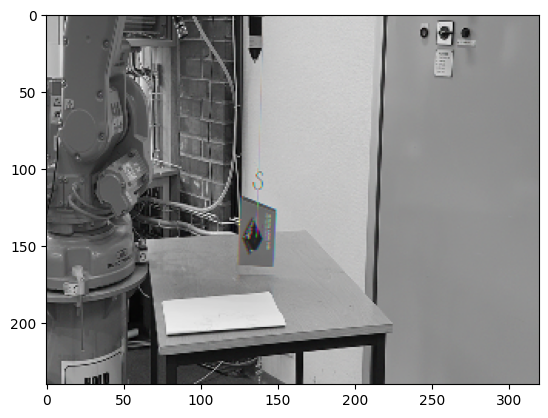

In [170]:
plt.imshow(obs[0], cmap='gray')
plt.show()